In [10]:
import os
import glob
import pandas as pd

src_dir = "../data/out_by_subject_csv/"
paths = glob.glob(os.path.join(src_dir, "*.csv"))

print("csv count:", len(paths))
if paths:
    print("sample file:", paths[0])

dead_ids = []

for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()

    if "died_in_icu" not in df.columns:
        print("missing column in:", os.path.basename(path))
        print("columns:", df.columns.tolist())
        continue

    died = df["died_in_icu"].astype(str).str.strip()
    if (died == "1").any():
        patient_id = os.path.splitext(os.path.basename(path))[0]
        dead_ids.append(patient_id)

print("dead count:", len(dead_ids))
print("dead ids:", dead_ids[:10])


csv count: 29900
sample file: ../data/out_by_subject_csv/15446796.csv
dead count: 2535
dead ids: ['18447474', '17760190', '17886030', '13612783', '11134366', '18248508', '17006066', '19668909', '15158950', '17017180']


In [12]:
import os
import glob
import pandas as pd

src_dir = "../data/out_by_subject_csv/"
paths = glob.glob(os.path.join(src_dir, "*.csv"))

counts = {"0": 0, "1": 0}

for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    if "died_in_icu" not in df.columns:
        continue

    died = df["died_in_icu"].astype(str).str.strip()
    counts["0"] += (died == "0").sum()
    counts["1"] += (died == "1").sum()

print("Survived(0):", counts["0"])
print("Died(1):", counts["1"])


Survived(0): 5987584
Died(1): 106227


Top missing features:
feature34    6093622
feature30    6092529
feature14    6060928
feature28    6042163
feature16    6028307
feature13    6028176
feature17    6027519
feature15    6027258
feature31    5939981
feature32    5869151
feature19    5866769
feature23    5864185
feature27    5859595
feature26    5857664
feature22    5849498
feature18    5843271
feature25    5842208
feature21    5842062
feature24    5834044
feature20    5829878
dtype: int64


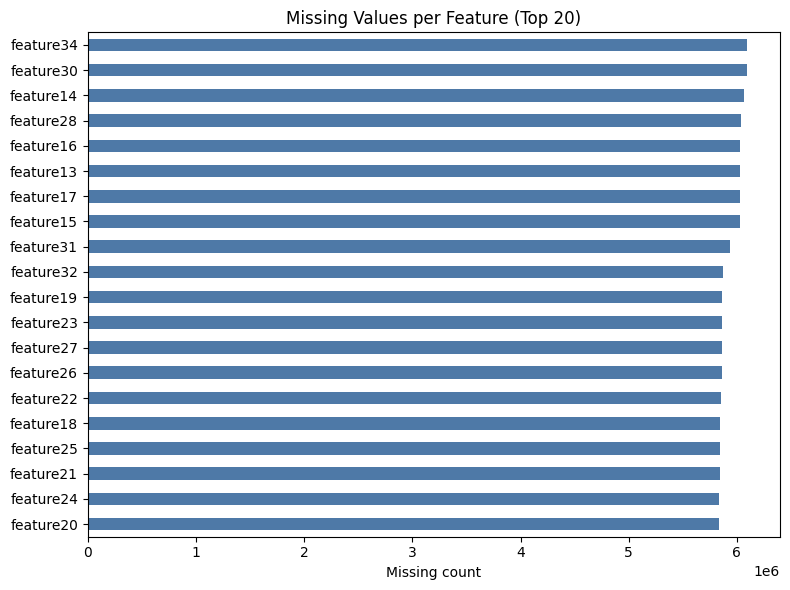

In [13]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

src_dir = "../data/out_by_subject_csv/"
paths = glob.glob(os.path.join(src_dir, "*.csv"))

# 1) 피처별 결측치 집계
missing_counts = None

for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    miss = df.isna().sum()

    if missing_counts is None:
        missing_counts = miss
    else:
        # 컬럼이 파일마다 다를 수 있어서 정렬해서 더함
        missing_counts = missing_counts.add(miss, fill_value=0)

missing_counts = missing_counts.sort_values(ascending=False)

print("Top missing features:")
print(missing_counts.head(20))

# 시각화 (상위 20개)
plt.figure(figsize=(8, 6))
missing_counts.head(20).sort_values().plot(kind="barh", color="#4E79A7")
plt.title("Missing Values per Feature (Top 20)")
plt.xlabel("Missing count")
plt.tight_layout()
plt.show()


In [14]:
import os
import glob
import pandas as pd

src_dir = "../data/out_by_subject_csv/"
paths = glob.glob(os.path.join(src_dir, "*.csv"))

stay_col = "patientunitstayid"  # 실제 컬럼명 맞게 수정
id_cols = {stay_col, "died_in_icu", "observation"}  # 피처에서 제외할 컬럼

missing_stats = {}  # stay_id -> [missing_count, total_cells]

for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()

    if stay_col not in df.columns:
        continue

    feature_cols = [c for c in df.columns if c not in id_cols]

    for stay_id, g in df.groupby(stay_col):
        miss = g[feature_cols].isna().sum().sum()
        total = g[feature_cols].size
        if stay_id in missing_stats:
            missing_stats[stay_id][0] += int(miss)
            missing_stats[stay_id][1] += int(total)
        else:
            missing_stats[stay_id] = [int(miss), int(total)]

# 결과 정리
rows = []
for stay_id, (miss, total) in missing_stats.items():
    rate = miss / total if total > 0 else 0
    rows.append([stay_id, miss, total, rate])

result = pd.DataFrame(rows, columns=["stay_id", "missing_count", "total_cells", "missing_rate"])
result = result.sort_values(["missing_rate", "missing_count"])

print(result.head(20))  # 결측치 적은 순 상위 20개


        stay_id  missing_count  total_cells  missing_rate
15151  38384680              9           37      0.243243
6046   31528630             72          111      0.648649
9102   38739793            169          259      0.652510
26808  36485297            123          185      0.664865
2866   34683224            641          962      0.666320
35882  39937115           1233         1850      0.666486
32761  34262636            768         1147      0.669573
31023  33744429           1264         1887      0.669846
14747  37815357           1415         2109      0.670934
33326  34498703            651          962      0.676715
33371  31400699           2841         4181      0.679503
33098  31916908            277          407      0.680590
16149  39688774            126          185      0.681081
2459   36623905           1890         2775      0.681081
5582   32795722           1009         1480      0.681757
8785   31487319            202          296      0.682432
32175  3334101

In [15]:
print(result.tail(20))  # 결측치 많은 순 하위 20개

        stay_id  missing_count  total_cells  missing_rate
6031   38457071            338          407      0.830467
29576  39473472            676          814      0.830467
13243  34012915            830          999      0.830831
3756   39660404            123          148      0.831081
5490   31171332            862         1036      0.832046
19515  30240703            154          185      0.832432
1363   33358685           1202         1443      0.832987
26591  32559954            555          666      0.833333
20895  39310616           1388         1665      0.833634
19234  38869595            401          481      0.833680
10512  32164880            617          740      0.833784
34026  30938261            588          703      0.836415
26205  35626060             62           74      0.837838
32605  31769431             62           74      0.837838
3671   31001183            155          185      0.837838
17692  30564557            186          222      0.837838
4931   3431976

In [16]:
import os
import glob
import pandas as pd

src_dir = "../data/out_by_subject_csv/"
paths = glob.glob(os.path.join(src_dir, "*.csv"))

label_col = "died_in_icu"
exclude_cols = {label_col, "observation", "patientunitstayid"}  # 필요시 수정

rows = []
for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()

    if label_col not in df.columns:
        continue

    feature_cols = [c for c in df.columns if c not in exclude_cols]

    miss = df[feature_cols].isna().sum().sum()
    total = df[feature_cols].size
    miss_rate = miss / total if total > 0 else 0

    # 파일 내에 1이 있으면 사망(1)으로 라벨링
    label = int((df[label_col].astype(str).str.strip() == "1").any())

    patient_id = os.path.splitext(os.path.basename(path))[0]
    rows.append([patient_id, miss, total, miss_rate, label, path])

df_stats = pd.DataFrame(rows, columns=["patient_id", "missing_count", "total_cells", "missing_rate", "label", "path"])
df_stats = df_stats.sort_values(["missing_rate", "missing_count"])

total_n = 10000
n_surv = int(total_n * 0.92)
n_dead = total_n - n_surv

surv = df_stats[df_stats["label"] == 0].head(n_surv)
dead = df_stats[df_stats["label"] == 1].head(n_dead)

sampled = pd.concat([surv, dead]).sample(frac=1, random_state=42)

print("sampled size:", len(sampled))
print("survived:", (sampled["label"] == 0).sum(), "dead:", (sampled["label"] == 1).sum())
print("sampled patient ids (first 20):", sampled["patient_id"].tolist()[:20])


sampled size: 10000
survived: 9200 dead: 800
sampled patient ids (first 20): ['10019917', '13564245', '15959868', '17931735', '17111595', '10561852', '12377381', '15395480', '15385393', '14493463', '15033599', '17440294', '17640768', '16923182', '14508670', '18685819', '18691670', '13194394', '13974348', '15190587']


In [25]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

# =========================
# 설정
# =========================
src_dir = "../data/out_by_subject_csv/"
label_col = "died_in_icu"
exclude_cols = {label_col, "observation", "patientunitstayid"}  # 필요시 수정

total_n = 10000  # 원하는 샘플 수
ratio_surv = 0.92
test_size = 0.2
random_state = 42

# =========================
# 1) 환자 파일별 결측치/라벨 계산
# =========================
paths = glob.glob(os.path.join(src_dir, "*.csv"))

rows = []
for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()

    if label_col not in df.columns:
        continue

    feature_cols = [c for c in df.columns if c not in exclude_cols]

    miss = df[feature_cols].isna().sum().sum()
    total = df[feature_cols].size
    miss_rate = miss / total if total > 0 else 0

    label = int((df[label_col].astype(str).str.strip() == "1").any())
    patient_id = os.path.splitext(os.path.basename(path))[0]

    rows.append([patient_id, miss, total, miss_rate, label, path])

df_stats = pd.DataFrame(
    rows,
    columns=["patient_id", "missing_count", "total_cells", "missing_rate", "label", "path"]
)

# 결측치 적은 순 정렬
df_stats = df_stats.sort_values(["missing_rate", "missing_count"]).reset_index(drop=True)

# =========================
# 2) 92:8 비율로 샘플링
# =========================
n_surv = int(total_n * ratio_surv)
n_dead = total_n - n_surv

surv = df_stats[df_stats["label"] == 0].head(n_surv)
dead = df_stats[df_stats["label"] == 1].head(n_dead)

sampled = pd.concat([surv, dead]).reset_index(drop=True)

print("sampled size:", len(sampled))
print("survived:", (sampled["label"] == 0).sum(), "dead:", (sampled["label"] == 1).sum())

# =========================
# 3) train/test 분할 + 병합 저장
# =========================
train_df, test_df = train_test_split(
    sampled,
    test_size=test_size,
    random_state=random_state,
    stratify=sampled["label"]
)

def concat_csvs(df, out_path):
    all_dfs = []
    for p in df["path"]:
        tmp = pd.read_csv(p)
        tmp["patient_id"] = os.path.splitext(os.path.basename(p))[0]
        all_dfs.append(tmp)
    merged = pd.concat(all_dfs, ignore_index=True)
    merged.to_csv(out_path, index=False)
    return merged

train_merged = concat_csvs(train_df, f"../data/{total_n}_train_merged.csv")
test_merged = concat_csvs(test_df, f"../data/{total_n}_test_merged.csv")

print("train size:", len(train_df), "test size:", len(test_df))
print("train merged rows:", len(train_merged))
print("test merged rows:", len(test_merged))



sampled size: 10000
survived: 9200 dead: 800
train size: 8000 test size: 2000
train merged rows: 1410586
test merged rows: 363348


In [23]:
# sampled가 이미 존재한다고 가정
sampled_sorted = sampled.sort_values(["missing_rate", "missing_count"]).reset_index(drop=True)

if len(sampled_sorted) == 0:
    raise ValueError("sampled가 비어있습니다.")

idx = min(total_n, len(sampled_sorted)) - 1  # 항상 유효 index
row_n = sampled_sorted.iloc[idx]
path_n = row_n["path"]

df_n = pd.read_csv(path_n)
df_n.columns = df_n.columns.str.strip()

feature_cols = [c for c in df_n.columns if c not in exclude_cols]

miss = df_n[feature_cols].isna().sum().sum()
total = df_n[feature_cols].size
miss_rate = miss / total if total > 0 else 0

vals = df_n[feature_cols].to_numpy().astype(float).ravel()
vals = vals[~pd.isna(vals)]

if len(vals) > 0:
    stats = {
        "mean": float(vals.mean()),
        "std": float(vals.std()),
        "min": float(vals.min()),
        "max": float(vals.max()),
    }
else:
    stats = {"mean": None, "std": None, "min": None, "max": None}

print(f"{idx+1}th (by missing_rate) patient file:", path_n)
print("missing_count:", miss, "total_cells:", total, "missing_rate:", miss_rate)
print("stats:", stats)


29746th (by missing_rate) patient file: ../data/out_by_subject_csv/12135860.csv
missing_count: 1334 total_cells: 1591 missing_rate: 0.8384663733500943
stats: {'mean': 107.88197146562905, 'std': 213.97972282546462, 'min': 0.0, 'max': 982.0}


In [24]:
import os
import glob
import pandas as pd

src_dir = "../data/out_by_subject_csv/"
paths = glob.glob(os.path.join(src_dir, "*.csv"))

missing_counts = None
total_counts = None

for path in paths:
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()

    miss = df.isna().sum()
    total = pd.Series({c: len(df) for c in df.columns})

    if missing_counts is None:
        missing_counts = miss
        total_counts = total
    else:
        missing_counts = missing_counts.add(miss, fill_value=0)
        total_counts = total_counts.add(total, fill_value=0)

missing_rate = (missing_counts / total_counts).sort_values(ascending=False)

print(missing_rate)


feature34            0.999969
feature30            0.999790
feature14            0.994604
feature28            0.991525
feature16            0.989251
feature13            0.989229
feature17            0.989121
feature15            0.989079
feature31            0.974756
feature32            0.963133
feature19            0.962742
feature23            0.962318
feature27            0.961565
feature26            0.961248
feature22            0.959908
feature18            0.958886
feature25            0.958712
feature21            0.958688
feature24            0.957372
feature20            0.956688
feature33            0.956233
feature29            0.955625
feature12            0.910040
feature9             0.851834
feature10            0.851489
feature11            0.851245
feature7             0.822775
feature6             0.627770
feature5             0.626905
feature8             0.381882
feature3             0.377995
feature4             0.369996
feature36            0.044128
feature35 